## Rentables for Project Comp257 

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [15]:
LGA = pd.read_excel('data/Rent-Tables-clean.xlsx', sheet_name= 0)
print("Shape of LGA: ",LGA.shape)

Shape of LGA:  (33067, 15)


In [16]:
LGA.replace(to_replace="y",value="",inplace=True)
LGA.head()

,GMR (Greater Metropolitan Region),Greater Sydney,Rings,LGA (Local Government Areas),Dwelling Types,Bedroom Numbers,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,Total,Total,Inner Ring,Total,Total,Total,500.0,640.0,800.0,15938.0,157667.0,-0.0154,-0.0078,-0.1501,0.0460
1,Total,Total,Inner Ring,Total,Total,Bedsitter,350.0,405.0,480.0,594.0,6062.0,-0.0581,0.0062,-0.2326,-0.1134
2,Total,Total,Inner Ring,Total,Total,1 Bedroom,450.0,530.0,610.0,5723.0,46592.0,-0.0185,-0.0185,-0.1513,0.0037
3,Total,Total,Inner Ring,Total,Total,Not Specified,420.0,580.0,750.0,694.0,14739.0,0.0000,-0.0333,-0.1506,-0.1608
4,Total,Total,Inner Ring,Total,Total,2 Bedrooms,600.0,700.0,800.0,6386.0,65131.0,0.0000,-0.0278,-0.1400,0.1066


In [17]:
postcode = pd.read_excel('data/Rent-Tables-clean.xlsx', sheet_name=1)
print("Shape of postcode: ",postcode.shape)
postcode.head()

Shape of postcode:  (16481, 12)


,Postcode,Dwelling Types,Bedroom Numbers,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,2505,Other,Total,50.0,53.0,55.0,30.0,80.0,0.0500,0.1932,15.0000,0.7778
1,2033,Other,Total,90.0,180.0,413.0,30.0,238.0,-0.4375,-0.2941,-0.2143,-0.3125
2,2739,Total,4 or more Bedrooms,95.0,110.0,110.0,30.0,36.0,0.0000,0.0000,0.6923,0.1000
3,2739,House,4 or more Bedrooms,95.0,110.0,110.0,30.0,36.0,0.0000,0.0000,0.6923,0.1000
4,2710,Total,1 Bedroom,108.0,120.0,148.0,30.0,71.0,0.0000,0.0000,-0.4286,-0.2000


In [18]:
LGA.dtypes

GMR (Greater Metropolitan Region)               object
Greater Sydney                                  object
Rings                                           object
LGA (Local Government Areas)                    object
Dwelling Types                                  object
Bedroom Numbers                                 object
First Quartile Weekly Rent for New Bonds\n$    float64
Median Weekly Rent for New Bonds\n$            float64
Third Quartile Weekly Rent for New Bonds\n$    float64
New Bonds Lodged\nNo.                          float64
Total Bonds Held\nNo.                          float64
Quarterly change in Median Weekly Rent         float64
Annual change in Median Weekly Rent            float64
Quarterly change in New Bonds Lodged           float64
Annual change in New Bonds Lodged              float64
dtype: object

In [19]:
LGA.columns

Index(['GMR (Greater Metropolitan Region)', 'Greater Sydney', 'Rings',
       'LGA (Local Government Areas)', 'Dwelling Types', 'Bedroom Numbers',
       'First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.', 'Quarterly change in Median Weekly Rent',
       'Annual change in Median Weekly Rent',
       'Quarterly change in New Bonds Lodged',
       'Annual change in New Bonds Lodged'],
      dtype='object')

In [20]:
LGA.rename(columns={'GMR (Greater Metropolitan Region)':'GMR',
                    'Greater Sydney':'Greater_Sydney',
                    'LGA (Local Government Areas)':'LGA',
                    'Dwelling Types':'Dwelling_Types',
                    'Bedroom Numbers':'Bedroom_Numbers'},
           inplace=True)

### Renaming Columns and determinig correlation

In [21]:
LGA_clean =  LGA[LGA.Bedroom_Numbers != 'Total']

In [22]:
LGA_clean =  LGA_clean[LGA_clean.Dwelling_Types != 'Total']

In [23]:
LGA_clean = LGA_clean[LGA_clean.LGA != 'Total']

In [24]:
LGA_clean.shape

(20848, 15)

C:\Users\mukit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mukit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


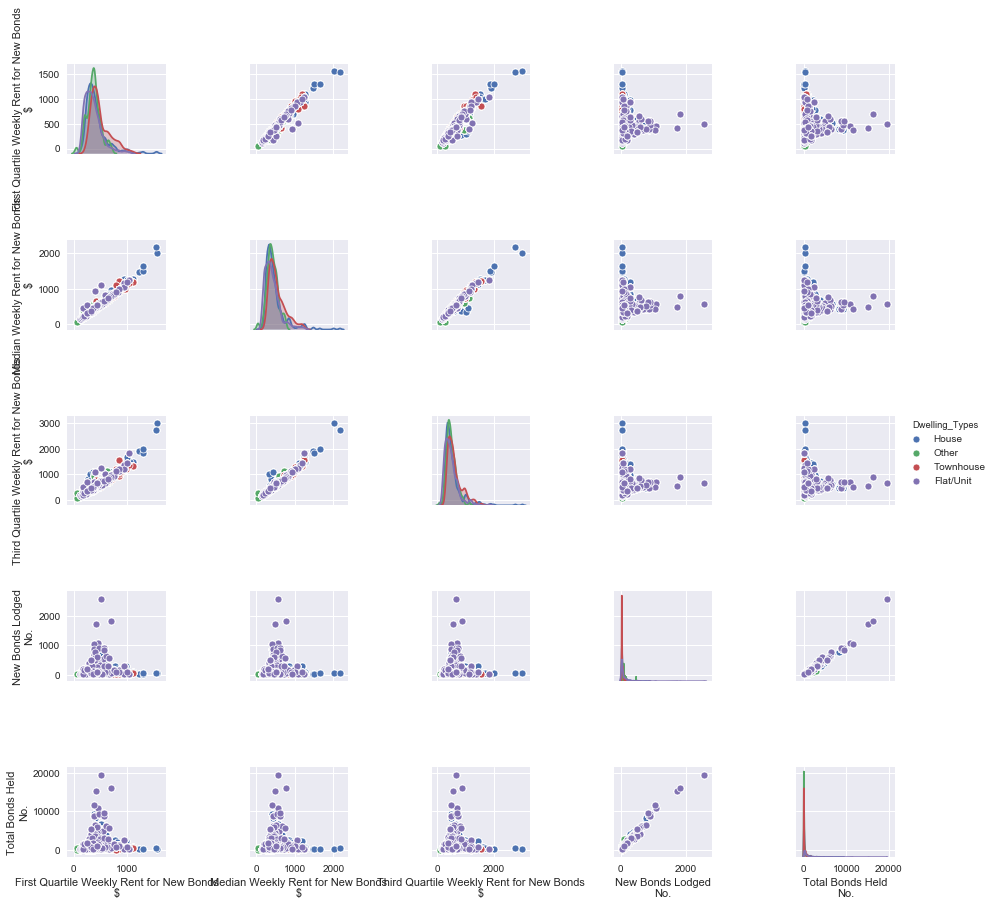

In [25]:
g = sns.pairplot(LGA_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'],hue='Dwelling_Types')

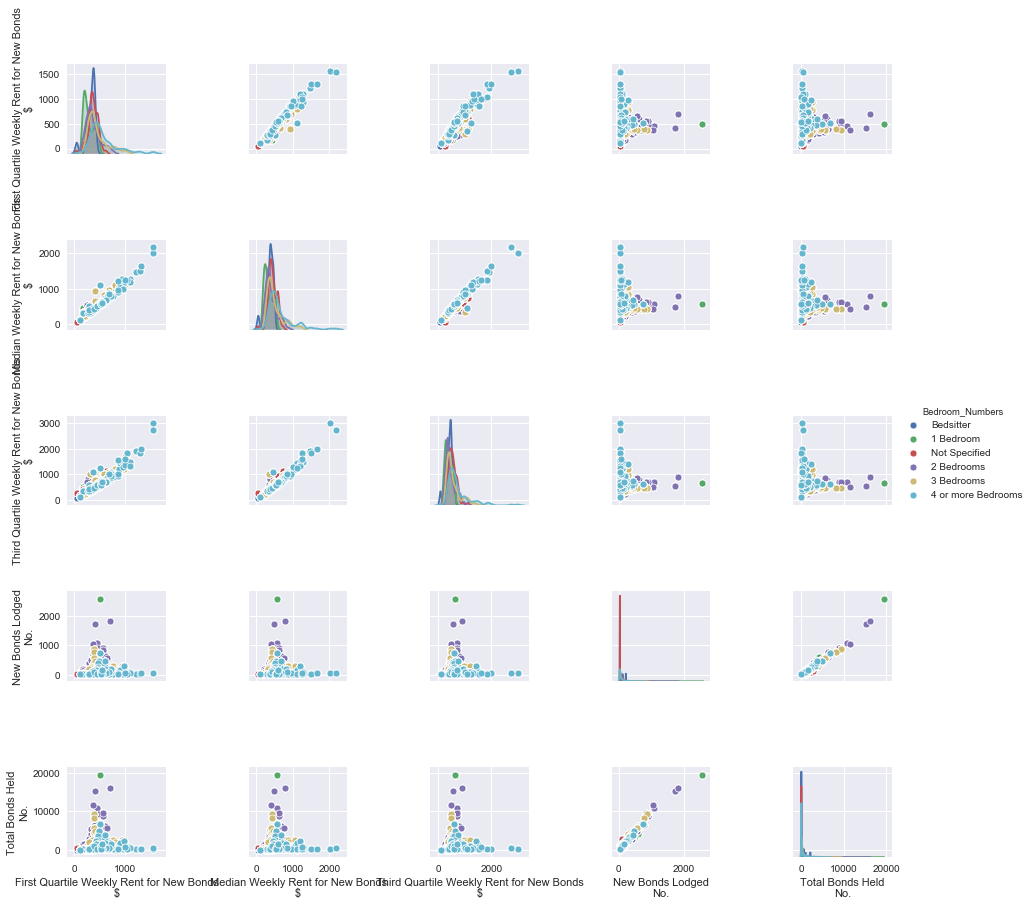

In [26]:
g = sns.pairplot(LGA_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'], hue='Bedroom_Numbers')

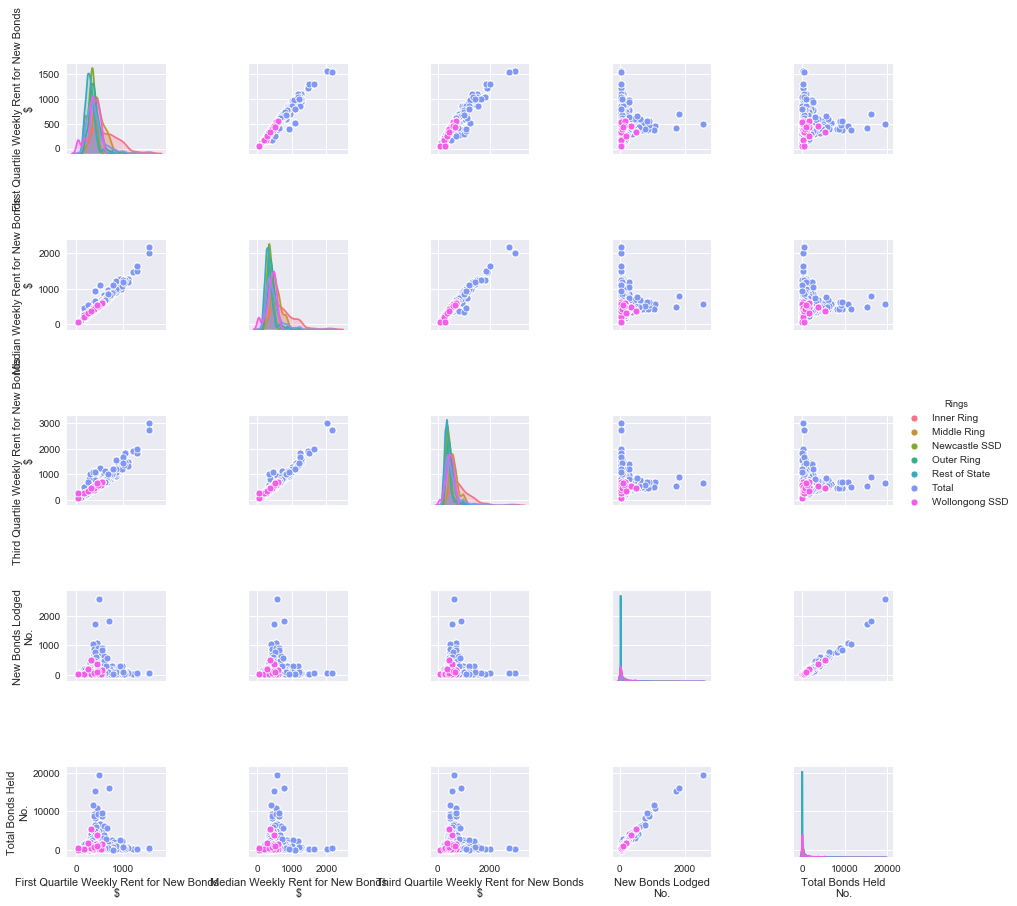

In [27]:
g = sns.pairplot(LGA_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'], hue='Rings')

In [28]:
LGA_clean.describe()

,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
count,6144.000000,6144.000000,6144.000000,6144.000000,14040.000000,6128.000000,6136.000000,6128.000000,6136.000000
mean,408.313802,465.692708,533.290365,97.917969,436.194872,-0.001098,-0.006369,0.079683,0.152504
std,191.751186,231.432171,289.484531,182.668190,1192.639839,0.161992,0.091915,0.464695,1.061455
min,50.000000,55.000000,85.000000,30.000000,30.000000,-0.872100,-0.862500,-0.721500,-0.705100
25%,290.000000,320.750000,359.500000,30.000000,34.000000,-0.042900,-0.049000,-0.181800,-0.130400
50%,368.000000,410.000000,460.000000,35.000000,95.000000,-0.006350,-0.011500,-0.012850,0.035700
75%,471.500000,530.000000,603.500000,87.250000,323.000000,0.021300,0.034700,0.215700,0.223300
max,1550.000000,2175.000000,3000.000000,2571.000000,19439.000000,2.755100,0.756800,6.000000,25.000000


In [ ]:
###

In [ ]:
postcode.rename(columns={'Bedroom Numbers':'Bedroom_Numbers'}, inplace=True)